In [6]:
#If you need to install in modules in jupyter notebook 
%pip install scikit-learn
%pip install pandas
%pip install matplotlib 
%pip install seaborn 
%pip install graphviz
%pip install scikit-plot   
%pip install statsmodels   


#Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)
import datetime # Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"


# Common imports
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy import stats
import scikitplot as skplt
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.linear_model import LinearRegression
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

# to make this notebook's output stable across runs
np.random.seed(42)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

os.makedirs(IMAGES_PATH, exist_ok=True)
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):

    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

You should consider upgrading via the 'c:\users\shaun\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.



Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\shaun\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.

You should consider upgrading via the 'c:\users\shaun\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.



Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\shaun\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\shaun\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\shaun\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'c:\users\shaun\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


In [7]:
#changes the output for the print statements
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth',0)

In [1097]:
#Pull 
df = pd.read_csv('https://raw.githubusercontent.com/Rodrig79/Machine-Learning-Data-Analysis-Project/master/rawData/pokemon.csv') 

In [1098]:
from sklearn import preprocessing

#Data Cleaning
df = df[~df.Name.str.contains('Mega')] #removed pokemon with "Mega" in it
df = df.drop(columns = ["Name","Type 1","Type 2","#","Generation"]) #Removed columns with names

#normalization
# X = df.values #returns a numpy array
# min_max_scaler = preprocessing.MinMaxScaler()
# x_scaled = min_max_scaler.fit_transform(X)
# df=pd.DataFrame(x_scaled, columns=df.columns)


In [1099]:
 #Splitting dataset to x and y
y = df.Attack
X = df[['Defense','HP','Sp. Atk','Sp. Def','Speed']]

In [323]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    
    train_errors, val_errors = [], []
    
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
        
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown

# MultiVariate  Regression with sklearn

In [39]:
 from sklearn.linear_model import LinearRegression

In [50]:
def MultiVariateLinearRegression(X,y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.60)
  regr = LinearRegression()
  regr.fit(X, y)
  print('Intercept: \n', regr.intercept_)
  print('Coefficients: \n', regr.coef_)
  kf = KFold(n_splits=10, random_state=None, shuffle=True)
  kf.get_n_splits(X)
  for train_index, test_index in kf.split(X):
        regr.fit(X_train, y_train)
        y_pred = regr.predict(X_train)
  print("coefficient of determination score",r2_score(y_train,y_pred))
  print("mean squared error",mean_squared_error(y_train,y_pred,squared =False))


In [51]:
MultiVariateLinearRegression(X,y)

Intercept: 
 8.210680550338907
Coefficients: 
 [ 0.44614817  0.36994363  0.18231691 -0.31638889  0.29630742]
coefficient of determination score 0.4287816961403771
mean squared error 22.285849382912


# Linear Regression with Gradient Descent 

In [1122]:
X_b = np.c_[np.ones((751, 1)), X]  # add x0 = 1 to each instance

theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

print(theta_best)

[46.15190005  0.41573725]


In [1123]:

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance

y_predict = X_new_b.dot(theta_best)
y_predict

array([46.15190005, 46.98337455])

In [1124]:
eta = 0.1
n_iterations = 10
m = 100
theta = np.random.randn(2, 1)
theta = np.squeeze(np.asarray(theta))
print (theta)
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
theta

[0.64768854 1.52302986]


array([2.47657005e+37, 2.07940080e+39])

In [1125]:
X_b.dot(theta)

array([1.01915405e+41, 1.31027016e+41, 1.72615032e+41, 8.94390002e+40,
       1.20630012e+41, 1.62218028e+41, 1.35185818e+41, 1.66376830e+41,
       2.07964846e+41, 7.28037937e+40, 1.14391810e+41, 1.03994806e+41,
       6.24067897e+40, 1.03994806e+41, 8.32007978e+40, 8.32007978e+40,
       1.14391810e+41, 1.55979826e+41, 7.28037937e+40, 1.24788814e+41,
       6.24067897e+40, 1.35185818e+41, 9.15184010e+40, 1.43503421e+41,
       8.32007978e+40, 1.14391810e+41, 1.76773834e+41, 2.28758854e+41,
       1.08153607e+41, 1.39344619e+41, 1.80932635e+41, 8.32007978e+40,
       1.18550611e+41, 1.60138627e+41, 9.98360042e+40, 1.51821024e+41,
       8.32007978e+40, 1.55979826e+41, 4.16127817e+40, 9.35978018e+40,
       7.28037937e+40, 1.45582822e+41, 1.14391810e+41, 1.45582822e+41,
       1.76773834e+41, 1.14391810e+41, 1.66376830e+41, 1.03994806e+41,
       1.24788814e+41, 5.20097857e+40, 1.03994806e+41, 7.28037937e+40,
       1.24788814e+41, 9.98360042e+40, 1.62218028e+41, 7.28037937e+40,
      

In [1126]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
            
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 240, 0, 350])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

<ipython-input-1126-3ecd99aff936>:14: RuntimeWarning: invalid value encountered in subtract
  theta = theta - eta * gradients
<ipython-input-1126-3ecd99aff936>:14: RuntimeWarning: invalid value encountered in subtract
  theta = theta - eta * gradients
<ipython-input-1126-3ecd99aff936>:14: RuntimeWarning: invalid value encountered in subtract
  theta = theta - eta * gradients


Saving figure gradient_descent_plot


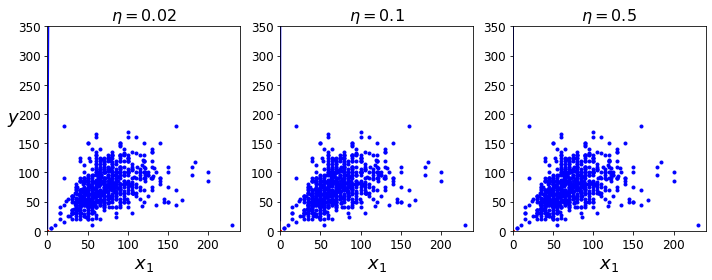

In [1127]:
np.random.seed(42)
theta = np.random.randn(2, 1)
theta = np.squeeze(np.asarray(theta))

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

save_fig("gradient_descent_plot")
plt.show()

# Gradient Descent Mini Batch

In [279]:
def minibatch(X,y,eta):
    theta_path_mgd = []
    X_b = np.c_[np.ones((751, 1)), X]  # add x0 = 1 to each instance
    m = len(X_b)
    n_iterations = 50
    minibatch_size = 31  
    np.random.seed(42)
    theta = np.random.randn(2,1)  # random initialization 
    t0, t1 = 200, 1000
    def learning_schedule(t):
        return t0 / (t + t1) 
    t = 0
    for epoch in range(n_iterations):
        shuffled_indices = np.random.permutation(m)
        X_b_shuffled = X_b[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        for i in range(0, m, minibatch_size):
            t += 1
            xi = X_b_shuffled[i:i+minibatch_size]
            yi = y_shuffled[i:i+minibatch_size]
            gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
            eta = learning_schedule(t)
            theta = theta - eta * gradients
            theta_path_mgd.append(theta)
    theta

In [280]:
Xarr = [[i] for i in X]
Xarr = np.array(Xarr)
yarr = [[i] for i in y]
yarr = np.array(yarr)

In [282]:
minibatch(Xa,ya,0.1)
theta

array([-1.03868168e+37, -8.14932855e+38])

# Regularized Regression Model
## Ridge

In [1170]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

linridge = Ridge(alpha=25.0).fit(X_train, y_train)

print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

ridge regression linear model intercept: 7.009233212820845
ridge regression linear model coeff:
[ 0.41417311  0.40321748  0.19917968 -0.29035188  0.26331594]
R-squared score (training): 0.417
R-squared score (test): 0.443
Number of non-zero features: 5


In [1171]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linridge = Ridge(alpha=0).fit(X_train_scaled, y_train)

print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test_scaled, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

ridge regression linear model intercept: 6.981054969701333
ridge regression linear model coeff:
[ 80.77108433 100.40955614  33.8626094  -52.27405793  46.08336067]
R-squared score (training): 0.417
R-squared score (test): 0.443
Number of non-zero features: 5


/usr/local/Cellar/jupyterlab/2.2.2/libexec/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/usr/local/Cellar/jupyterlab/2.2.2/libexec/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=9.26921e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
/usr/local/Cellar/jupyterlab/2.2.2/libexec/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=2.96239e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
/usr/local/Cellar/jupyterlab/2.2.2/libexec/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=2.45401e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
/usr/local/C

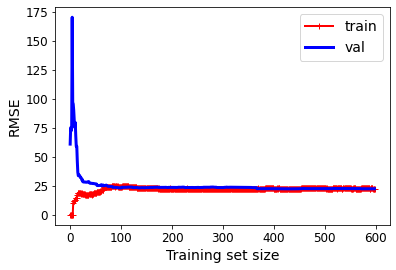

In [1172]:
plot_learning_curves(linridge,X,y)

In [1173]:
print('Ridge regression: effect of alpha regularization parameter\n')
for this_alpha in [0, 1, 10, 20, 50, 100, 1000]:
    linridge = Ridge(alpha = this_alpha).fit(X_train_scaled, y_train)
    r2_train = linridge.score(X_train_scaled, y_train)
    r2_test = linridge.score(X_test_scaled, y_test)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
    print('Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \
r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))

Ridge regression: effect of alpha regularization parameter

Alpha = 0.00
num abs(coeff) > 1.0: 5, r-squared training: 0.42, r-squared test: 0.44

Alpha = 1.00
num abs(coeff) > 1.0: 5, r-squared training: 0.41, r-squared test: 0.44

Alpha = 10.00
num abs(coeff) > 1.0: 5, r-squared training: 0.32, r-squared test: 0.33

Alpha = 20.00
num abs(coeff) > 1.0: 5, r-squared training: 0.26, r-squared test: 0.27

Alpha = 50.00
num abs(coeff) > 1.0: 5, r-squared training: 0.18, r-squared test: 0.18

Alpha = 100.00
num abs(coeff) > 1.0: 5, r-squared training: 0.11, r-squared test: 0.11

Alpha = 1000.00
num abs(coeff) > 1.0: 2, r-squared training: 0.02, r-squared test: 0.01



## Lasso Regression

In [1174]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linlasso = Lasso(alpha=1, max_iter = 10000).fit(X_train_scaled, y_train)

print('lasso regression linear model intercept: {}'
     .format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(linlasso.coef_))
print('Non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {:.3f}'
     .format(linlasso.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(X_test_scaled, y_test)))
print('Features with non-zero weight (sorted by absolute magnitude):')

for e in sorted (list(zip(list(X), linlasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

lasso regression linear model intercept: 51.4179473980567
lasso regression linear model coeff:
[31.23253863  4.62098601 21.37208733  0.         12.45041015]
Non-zero features: 4
R-squared score (training): 0.219
R-squared score (test): 0.223

Features with non-zero weight (sorted by absolute magnitude):
	Defense, 31.233
	Sp. Atk, 21.372
	Speed, 12.450
	HP, 4.621


/usr/local/Cellar/jupyterlab/2.2.2/libexec/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent(


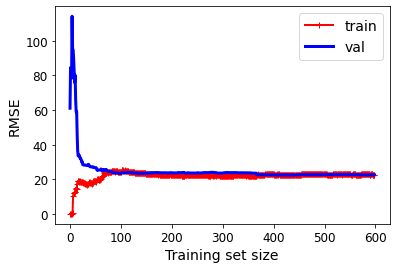

In [1175]:
plot_learning_curves(linlasso,X,y)

In [1176]:

print('Lasso regression: effect of alpha regularization\n\
parameter on number of features kept in final model\n')

for alpha in [0.5, 1, 2, 3, 5, 10, 20, 50]:
    linlasso = Lasso(alpha, max_iter = 10000).fit(X_train_scaled, y_train)
    r2_train = linlasso.score(X_train_scaled, y_train)
    r2_test = linlasso.score(X_test_scaled, y_test)
    
    print('Alpha = {:.2f}\nFeatures kept: {}, r-squared training: {:.2f}, \
r-squared test: {:.2f}\n'
         .format(alpha, np.sum(linlasso.coef_ != 0), r2_train, r2_test))

Lasso regression: effect of alpha regularization
parameter on number of features kept in final model

Alpha = 0.50
Features kept: 4, r-squared training: 0.34, r-squared test: 0.35

Alpha = 1.00
Features kept: 4, r-squared training: 0.22, r-squared test: 0.22

Alpha = 2.00
Features kept: 1, r-squared training: 0.01, r-squared test: 0.00

Alpha = 3.00
Features kept: 0, r-squared training: 0.00, r-squared test: -0.01

Alpha = 5.00
Features kept: 0, r-squared training: 0.00, r-squared test: -0.01

Alpha = 10.00
Features kept: 0, r-squared training: 0.00, r-squared test: -0.01

Alpha = 20.00
Features kept: 0, r-squared training: 0.00, r-squared test: -0.01

Alpha = 50.00
Features kept: 0, r-squared training: 0.00, r-squared test: -0.01



## Polynomial regression

In [1177]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold # import k-fold validation
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split
    

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    
    train_errors, val_errors = [], []
    
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
        
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown

POLYNOMIAL DEGREE-2 W/ LINEAR REGRESSION
(poly deg 2) linear model coeff (w):
[ 0.00000000e+00  7.83632395e-01  5.81316973e-01  8.36628758e-02
 -3.03589224e-01  2.17935028e-01 -2.64092610e-03  4.12878549e-03
 -2.05705057e-03 -1.36610177e-03 -5.91249232e-06 -3.96493171e-03
 -2.46874919e-03  2.19326197e-03  4.71140219e-03  5.30018156e-03
 -4.63437500e-03 -2.32196045e-03  2.37022152e-03 -8.05809773e-04
 -6.17839096e-04]
(poly deg 2) linear model intercept (b): -6.663
(poly deg 2) R-squared score (training): 0.514
(poly deg 2) R-squared score (test): 0.477
(poly deg 2) RMSE score (train): 20.939
(poly deg 2) RMSE score (test): 21.262

POLYNOMIAL DEGREE-3 W/ LINEAR REGRESSION
(poly deg 3) linear model coeff (w):
[ 1.09582330e-10  9.63693242e-01 -1.68716025e+00  2.32220783e+00
 -1.47109972e+00 -7.42478680e-02 -9.34907237e-03  1.87006590e-02
 -2.78074030e-02  1.70931737e-02  4.16698973e-03  1.27650489e-02
 -5.55729820e-03  1.19546395e-02  1.94395528e-02 -8.89151315e-03
 -8.15594151e-04 -5.397

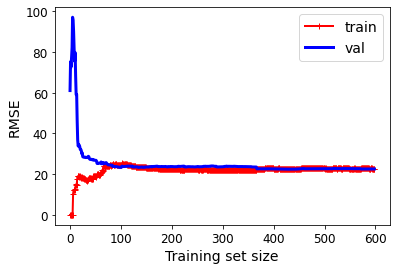

In [1178]:
for degree in [2, 3, 5,10]:
    poly = PolynomialFeatures(degree)
    X_F1_poly = poly.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y, random_state=0)
    linreg = LinearRegression().fit(X_train, y_train)

    print('POLYNOMIAL DEGREE-{} W/ LINEAR REGRESSION'.format(degree))
    print('(poly deg {}) linear model coeff (w):\n{}'
         .format(degree, linreg.coef_))
    print('(poly deg {}) linear model intercept (b): {:.3f}'
         .format(degree, linreg.intercept_))
    print('(poly deg {}) R-squared score (training): {:.3f}'
         .format(degree, linreg.score(X_train, y_train)))
    print('(poly deg {}) R-squared score (test): {:.3f}'
         .format(degree, linreg.score(X_test, y_test)))
    print('(poly deg {}) RMSE score (train): {:.3f}'
         .format(degree, sqrt(mean_squared_error(y_train, linreg.predict(X_train)))))
    print('(poly deg {}) RMSE score (test): {:.3f}\n'
         .format(degree, sqrt(mean_squared_error(y_test, linreg.predict(X_test)))))

plot_learning_curves(linreg,  X,y)

POLYNOMIAL DEGREE-2 W/ RIDGE REGRESSION
(poly deg 2) linear model coeff (w):
[ 0.00000000e+00  7.83561256e-01  5.81248959e-01  8.36606865e-02
 -3.03533540e-01  2.17897801e-01 -2.64075722e-03  4.12917773e-03
 -2.05708348e-03 -1.36616736e-03 -5.60359635e-06 -3.96475273e-03
 -2.46871137e-03  2.19313880e-03  4.71163080e-03  5.30016917e-03
 -4.63433789e-03 -2.32194092e-03  2.37009827e-03 -8.06078647e-04
 -6.17730005e-04]
(poly deg 2) linear model intercept (b): -6.659
(poly deg 2) R-squared score (training): 0.514
(poly deg 2) R-squared score (test): 0.477
(poly deg 2) RMSE score (train): 20.939
(poly deg 2) RMSE score (test): 21.262

POLYNOMIAL DEGREE-3 W/ RIDGE REGRESSION
(poly deg 3) linear model coeff (w):
[ 0.00000000e+00  9.62069563e-01 -1.68358847e+00  2.31876270e+00
 -1.46747506e+00 -7.31761141e-02 -9.33646847e-03  1.86938416e-02
 -2.77955470e-02  1.70822169e-02  4.19307280e-03  1.27382279e-02
 -5.53520793e-03  1.19199550e-02  1.94080912e-02 -8.88527363e-03
 -8.00337144e-04 -5.36569

/usr/local/Cellar/jupyterlab/2.2.2/libexec/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.04438e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/usr/local/Cellar/jupyterlab/2.2.2/libexec/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


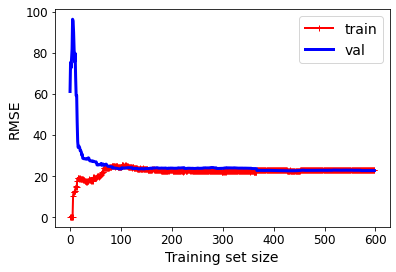

In [1179]:
for degree in [2, 3, 5, 10]:
    poly = PolynomialFeatures(degree)
    X_F1_poly = poly.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y, random_state=0)
    linreg = Ridge().fit(X_train, y_train)

    print('POLYNOMIAL DEGREE-{} W/ RIDGE REGRESSION'.format(degree))
    print('(poly deg {}) linear model coeff (w):\n{}'
         .format(degree, linreg.coef_))
    print('(poly deg {}) linear model intercept (b): {:.3f}'
         .format(degree, linreg.intercept_))
    print('(poly deg {}) R-squared score (training): {:.3f}'
         .format(degree, linreg.score(X_train, y_train)))
    print('(poly deg {}) R-squared score (test): {:.3f}'
         .format(degree, linreg.score(X_test, y_test)))
    print('(poly deg {}) RMSE score (train): {:.3f}'
         .format(degree, sqrt(mean_squared_error(y_train, linreg.predict(X_train)))))
    print('(poly deg {}) RMSE score (test): {:.3f}\n'
         .format(degree, sqrt(mean_squared_error(y_test, linreg.predict(X_test)))))

plot_learning_curves(linreg,  X,y)